In [ ]:
 # Install required libraries if not already installed
!pip install pandas numpy

import pandas as pd
import numpy as np
from google.colab import files

# Upload the CSV file
# Assuming 'products.csv' is in the current directory
df = pd.read_csv('/content/Products.csv')

# Print the column names to verify the correct name
print(df.columns)

# Print null values
print(df.isnull().sum())

# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values, adjust method as needed

# Remove duplicates
df.drop_duplicates(inplace=True)

# Print the cleaned dataset
print(df)

# Save the cleaned dataset
df.to_csv('cleaned_products.csv', index=False)

print(df)


Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71            

In [ ]:
# prompt: using the cleaned dataset please find head, tail and arrange them in accending and decending order

# Display the first few rows (head)
print(df.head())

# Display the last few rows (tail)
print(df.tail())

# Sort the DataFrame by a specific column in ascending order (replace 'column_name' with the actual column)
df_ascending = df.sort_values(by='product_weight_g')
print(df_ascending)

# Sort the DataFrame by a specific column in descending order
df_descending = df.sort_values(by='product_weight_g', ascending=False)
print(df_descending)


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0     

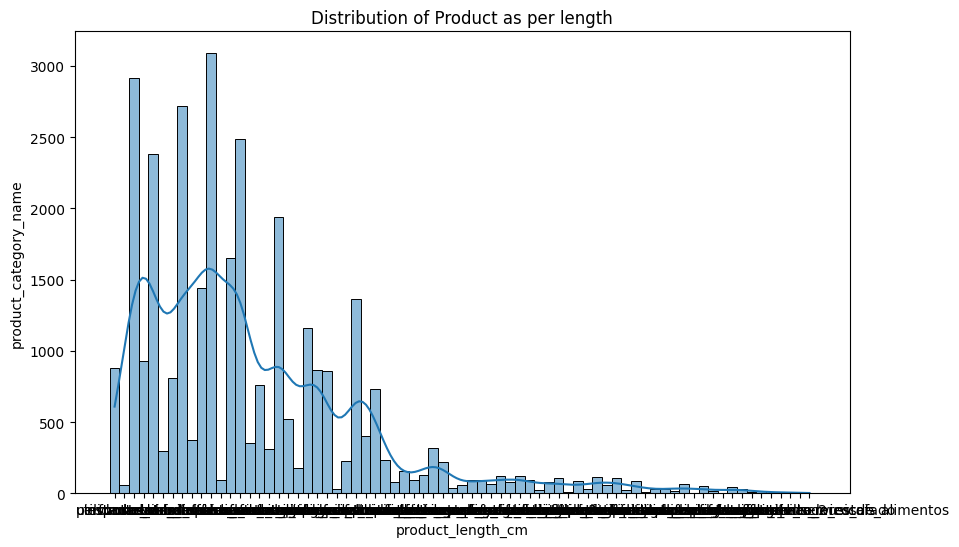

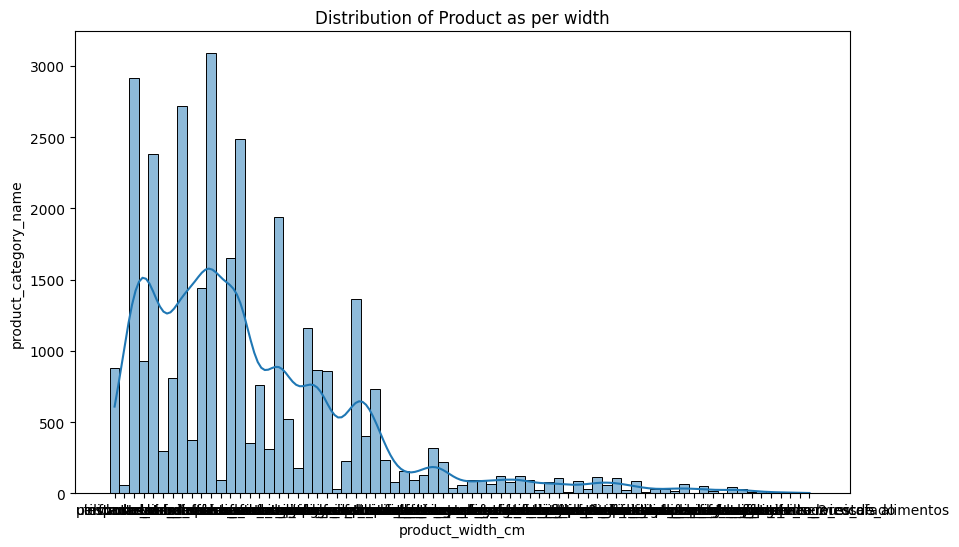

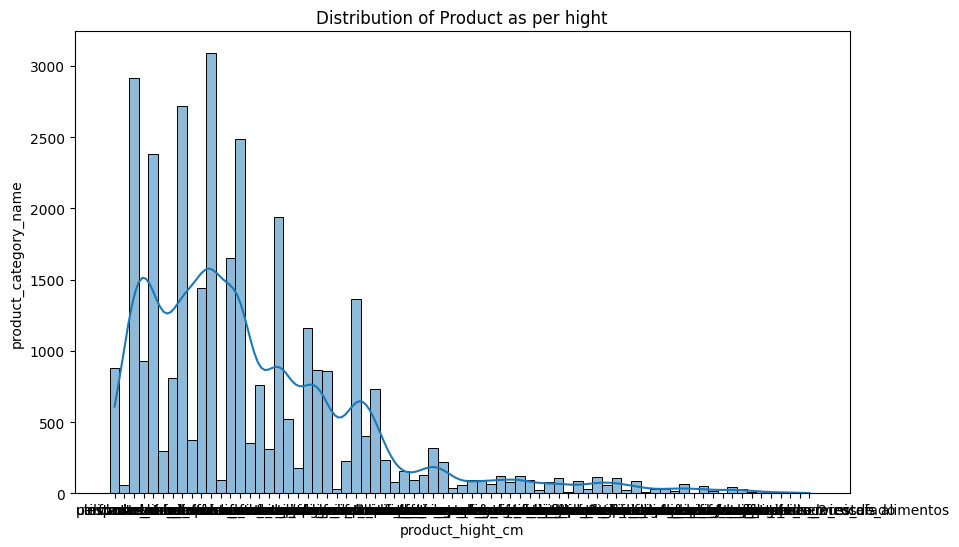

In [ ]:
# prompt:  plot various graphs by using the parameters in the dataset products

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['product_category_name'], kde=True)
plt.xlabel('product_length_cm')
plt.ylabel('product_category_name')
plt.title('Distribution of Product as per length')
plt.show()

# Histogram of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['product_category_name'], kde=True)
plt.xlabel('product_width_cm')
plt.ylabel('product_category_name')
plt.title('Distribution of Product as per width')
plt.show()


# Histogram of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['product_category_name'], kde=True)
plt.xlabel('product_hight_cm')
plt.ylabel('product_category_name')
plt.title('Distribution of Product as per hight')
plt.show()


product_category_name
cama_mesa_banho                  3087
esporte_lazer                    2916
moveis_decoracao                 2719
beleza_saude                     2490
utilidades_domesticas            2381
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


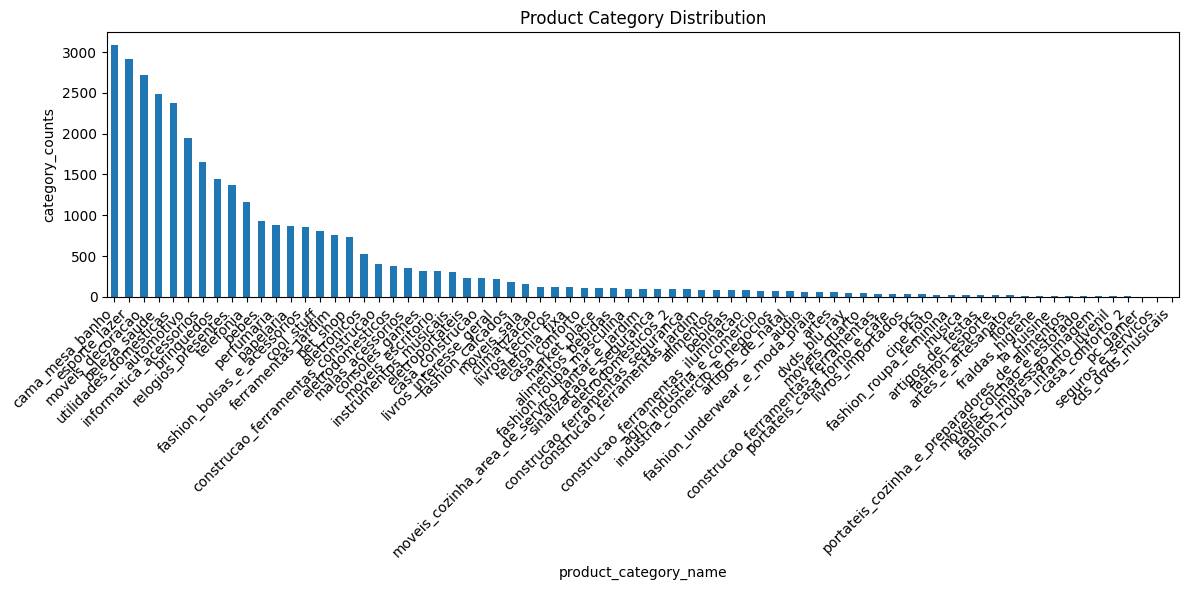

In [ ]:
# prompt: write a code for 1. Analyze the number of products in each category to understand the product mix and identify dominant categories.

import matplotlib.pyplot as plt
# Group products by category and count the number of products in each category
category_counts = df['product_category_name'].value_counts()

# Print the category counts
print(category_counts)

# Create a bar chart to visualize the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('product_category_name')
plt.ylabel('category_counts')
plt.title('Product Category Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


product_category_name
agro_industria_e_comercio    25
alimentos                    34
alimentos_bebidas            39
artes                        27
artes_e_artesanato           15
                             ..
sinalizacao_e_seguranca      33
tablets_impressao_imagem      7
telefonia                    48
telefonia_fixa               37
utilidades_domesticas        55
Name: product_name_lenght, Length: 73, dtype: int64


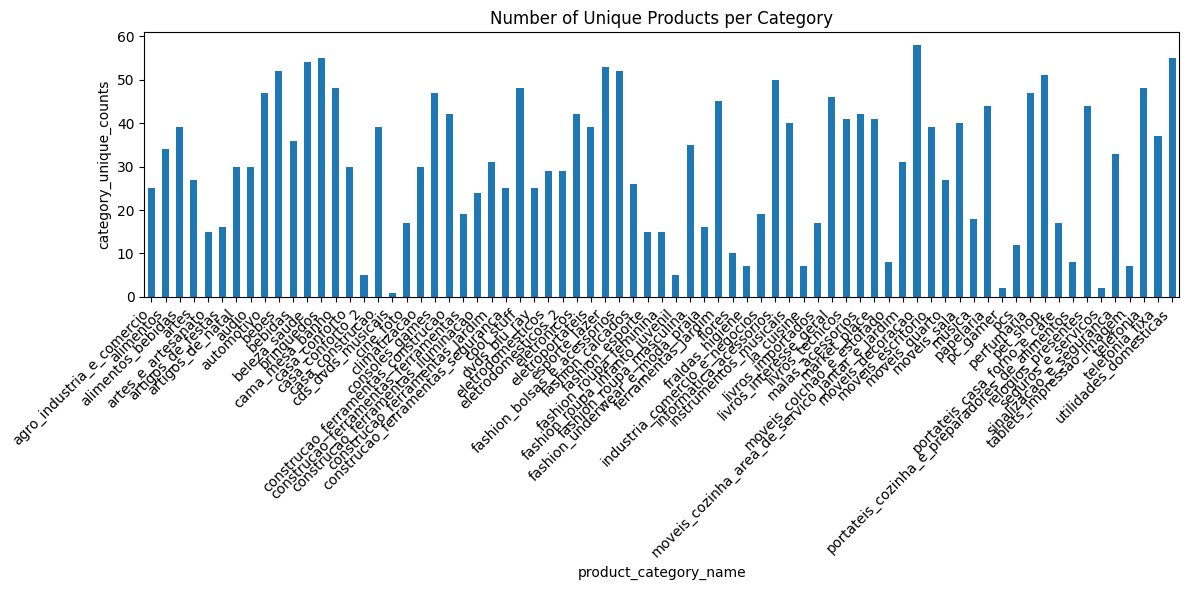

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Count the number of unique products (names) within each category to identify categories with the most variations.

import matplotlib.pyplot as plt
# Group products by category and count the number of unique product names in each category
category_unique_counts = df.groupby('product_category_name')['product_name_lenght'].nunique()

# Print the category unique counts
print(category_unique_counts)

# Create a bar chart to visualize the category unique counts
plt.figure(figsize=(12, 6))
category_unique_counts.plot(kind='bar')
plt.xlabel('product_category_name')
plt.ylabel('category_unique_counts')
plt.title('Number of Unique Products per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
df.to_csv('unique_products_by_category.csv', index=False)
from google.colab import files
files.download('unique_products_by_category.csv')


In [ ]:
# prompt: Calculate average weight and dimensions for each category or overall to understand product size and weight trends.

# Calculate average weight and dimensions for each category
category_avg = df.groupby('product_category_name')[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean()
print(category_avg)

# Calculate overall average weight and dimensions
overall_avg = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean()
print(overall_avg)
df.to_csv('average_weight_and_dimensions.csv', index=False)
from google.colab import files
files.download('average_weight_and_dimensions.csv')


                           product_weight_g  product_length_cm  \
product_category_name                                            
agro_industria_e_comercio       5398.597403          36.363636   
alimentos                        932.588235          21.388235   
alimentos_bebidas               1331.666667          23.466667   
artes                           1666.910714          35.571429   
artes_e_artesanato              1155.850000          27.850000   
...                                     ...                ...   
sinalizacao_e_seguranca         2970.138298          30.531915   
tablets_impressao_imagem         381.444444          28.111111   
telefonia                        250.084629          18.692573   
telefonia_fixa                   680.722689          21.134454   
utilidades_domesticas           3012.623268          31.839143   

                           product_height_cm  product_width_cm  
product_category_name                                           
agro_indust

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Identify products that may be miscategorized or require re-categorization based on their name, weight, or dimensions.

# Calculate z-scores for weight and dimensions for each product within its category
from scipy import stats

df['weight_zscore'] = df.groupby('product_category_name')['product_weight_g'].transform(lambda x: stats.zscore(x, nan_policy='omit'))
df['length_zscore'] = df.groupby('product_category_name')['product_length_cm'].transform(lambda x: stats.zscore(x, nan_policy='omit'))
df['height_zscore'] = df.groupby('product_category_name')['product_height_cm'].transform(lambda x: stats.zscore(x, nan_policy='omit'))
df['width_zscore'] = df.groupby('product_category_name')['product_width_cm'].transform(lambda x: stats.zscore(x, nan_policy='omit'))

# Set a threshold for z-scores to identify potential outliers (adjust as needed)
threshold = 2

# Filter products with z-scores exceeding the threshold for any attribute
potential_miscategorized = df[(df['weight_zscore'].abs() > threshold) |
                              (df['length_zscore'].abs() > threshold) |
                              (df['height_zscore'].abs() > threshold) |
                              (df['width_zscore'].abs() > threshold)]

print(potential_miscategorized)
df.to_csv('potential_miscategorized.csv', index=False)
from google.colab import files
files.download('potential_miscategorized.csv')


                             product_id   product_category_name  \
6      732bd381ad09e530fe0a5f457d81becb              cool_stuff   
18     a0736b92e52f6cead290e30b578413b6        moveis_decoracao   
25     8ba4f2a4ae695d26e5626c1bf710975e   utilidades_domesticas   
31     e1d1d22e9f8122a4ec1533b032c12562      ferramentas_jardim   
36     b8dac5113b06a97e64943234522572b9              automotivo   
...                                 ...                     ...   
32914  07ae32b18ffbde7c6c928721e8b956fb           esporte_lazer   
32915  d790fcd60d4743d309fedf7e7bb4c902            beleza_saude   
32932  0bf1dea484fbb8cdfa09e2767ce30574               alimentos   
32943  3becff10d1deb92b02f2a1ee62a04524  informatica_acessorios   
32950  106392145fca363410d287a815be6de4         cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
6                     56.0                      1272.0                 4.0   
18                    56.0             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                           product_weight_g  product_length_cm  \
product_category_name                                            
agro_industria_e_comercio       5398.597403          36.363636   
alimentos                        932.588235          21.388235   
alimentos_bebidas               1331.666667          23.466667   
artes                           1666.910714          35.571429   
artes_e_artesanato              1155.850000          27.850000   
...                                     ...                ...   
sinalizacao_e_seguranca         2970.138298          30.531915   
tablets_impressao_imagem         381.444444          28.111111   
telefonia                        250.084629          18.692573   
telefonia_fixa                   680.722689          21.134454   
utilidades_domesticas           3012.623268          31.839143   

                           product_height_cm  product_width_cm  
product_category_name                                           
agro_indust

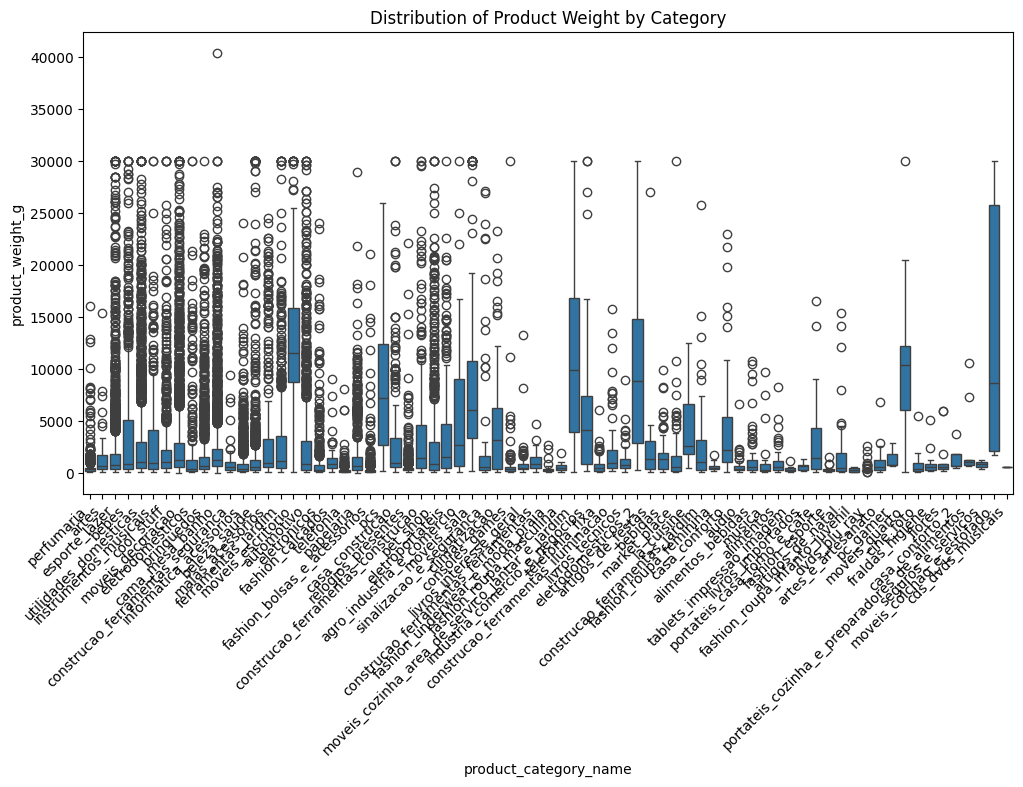

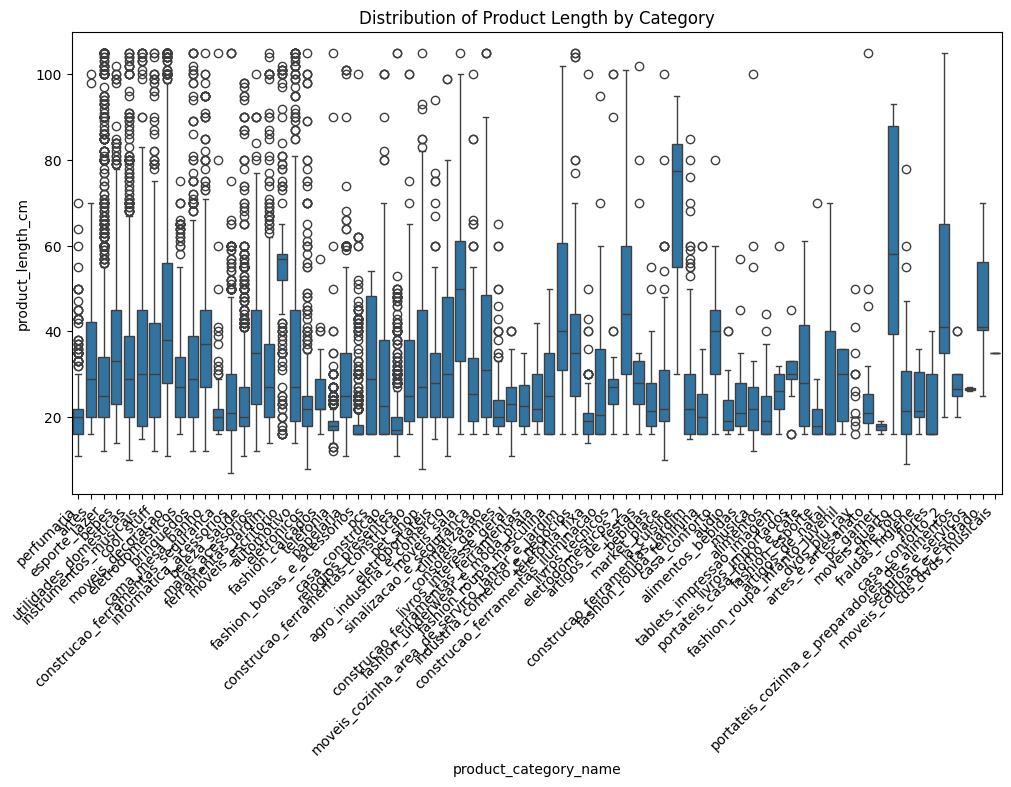

Heavy Products:
                              product_id      product_category_name  \
6      732bd381ad09e530fe0a5f457d81becb                 cool_stuff   
44     7a8dac4aaa16bc642e4df33adcf03303                 cool_stuff   
46     5f504b3a1c75b73d6151be81eb05bdc9                 cool_stuff   
68     1e5428c428e0f783acd6e3d94ba4ee2a                        pcs   
79     07f01b6fcacc1b187a71e5074199db2d  agro_industria_e_comercio   
...                                 ...                        ...   
32831  589c0d57d007f11fee1db92a2ae3f376                 brinquedos   
32832  11185dbab7a8593a8f117c4df8be18dd           moveis_decoracao   
32857  0ac0d30f666402b0d004e26c5e57eb0f      instrumentos_musicais   
32876  342d75eedb9ec1ecb6d959f76f8f457a                eletronicos   
32946  a0b7d5a992ccda646f2d34e418fff5a0           moveis_decoracao   

       product_name_lenght  product_description_lenght  product_photos_qty  \
6                     56.0                      1272.0          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Analyze weight and dimensions to understand shipping costs, packaging requirements, and logistics challenges.

import matplotlib.pyplot as plt
# Calculate average weight and dimensions for each category
category_avg = df.groupby('product_category_name')[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean()
print(category_avg)

# Calculate overall average weight and dimensions
overall_avg = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean()
print(overall_avg)

# Visualize distribution of weight and dimensions
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Weight by Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_length_cm', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Length by Category')
plt.show()

# ... (Similar boxplots for height and width)

# Analyze correlations between weight, dimensions, and shipping costs (if you have shipping cost data)
# ... (Code to calculate correlations and visualize them)

# Identify products with extreme weight or dimensions that might require special handling
heavy_products = df[df['product_weight_g'] > df['product_weight_g'].quantile(0.95)]
large_products = df[(df['product_length_cm'] > df['product_length_cm'].quantile(0.95)) |
                     (df['product_height_cm'] > df['product_height_cm'].quantile(0.95)) |
                     (df['product_width_cm'] > df['product_width_cm'].quantile(0.95))]

print("Heavy Products:\n", heavy_products)
print("\nLarge Products:\n", large_products)

# ... (Further analysis based on specific business requirements and available data)
df.to_csv('complete_analysis.csv', index=False)
from google.colab import files
files.download('complete_analysis.csv')


In [ ]:
# prompt: Group products by weight, dimensions, or category to identify opportunities for bundling, upselling, or cross-selling.

import pandas as pd
# Group products by category and find frequently co-purchased items (if you have purchase history data)
# ... (Code to analyze purchase history and identify co-purchase patterns)

# Group products by similar dimensions for packaging optimization
dimension_groups = df.groupby(['product_length_cm', 'product_height_cm', 'product_width_cm'])['product_id'].apply(list)
print(dimension_groups)

# Group products by weight for shipping cost optimization
weight_groups = df.groupby(pd.cut(df['product_weight_g'], bins=5))['product_id'].apply(list)
print(weight_groups)

# ... (Further analysis and recommendations based on specific business goals)
df.to_csv('grouping.csv', index=False)
from google.colab import files
files.download('grouping.csv')

product_length_cm  product_height_cm  product_width_cm
7.0                7.0                10.0                               [34d6306314a47fe15c1efdbc23302020]
8.0                6.0                6.0                                [2f763ba79d9cd987b2034aac7ceffe06]
                   13.0               8.0                                [67d1a56495104e195338ec9007fcf758]
9.0                9.0                8.0                                [096d687ce8c7ae68039cce3f229b1d4c]
                   11.0               12.0                               [781ae1be29375f62847b894fb20a1cbe]
                                                                                ...                        
105.0              50.0               20.0                               [b4436da747c3a53ab07ac0e71de17dcd]
                   65.0               20.0                               [343c15a347e523f2b6cf38a5db81e179]
                                      25.0                [de9305867467640bebc680

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Validate data consistency and accuracy by checking for missing values, duplicates, or inconsistencies in id, category, name, weight, and dimensions.

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

# Check for inconsistencies in product IDs (assuming product_id should be unique)
inconsistent_ids = df[df['product_id'].duplicated(keep=False)]
print("\nInconsistent Product IDs:\n", inconsistent_ids)

# Check for inconsistencies in category names (e.g., typos, capitalization issues)
category_names = df['product_category_name'].unique()
print("\nUnique Category Names:\n", category_names)
# Manually inspect for inconsistencies

# Check for inconsistencies in product names (e.g., typos, formatting issues)
# This might require more sophisticated text analysis techniques
# For a simple check, you can look at the length of product names
name_lengths = df['product_name_lenght'].describe()
print("\nProduct Name Length Statistics:\n", name_lengths)
# Further analysis might involve checking for unusual characters, etc.

# Check for inconsistencies in weight and dimensions
# You can use descriptive statistics and visualizations to identify outliers
weight_stats = df['product_weight_g'].describe()
length_stats = df['product_length_cm'].describe()
height_stats = df['product_height_cm'].describe()
width_stats = df['product_width_cm'].describe()

print("\nWeight Statistics:\n", weight_stats)
print("\nLength Statistics:\n", length_stats)
print("\nHeight Statistics:\n", height_stats)
print("\nWidth Statistics:\n", width_stats)

# Visualize distributions using boxplots or histograms to identify potential outliers
# ... (Code for boxplots or histograms as shown in previous responses)
df.to_csv('Complete_stat.csv', index=False)
from google.colab import files
files.download('Complete_stat.csv')

# Further analysis might involve comparing weight and dimensions within categories
# to identify products that deviate significantly from the average for their category
# ... (Code for calculating z-scores or other outlier detection methods as shown before)


Missing Values:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
weight_zscore                 1
length_zscore                 1
height_zscore                 1
width_zscore                  1
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, weight_zscore, length_zscore, height_zscore, width_zscore]
Index: []

Inconsistent Product IDs:
 Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, weight_zscore, length_zscore, h

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>